# Question
What are some conclusions you can find from the data?

In [1]:
import numpy as np
import csv
import pandas as pd
pd.set_option('display.max_columns', 500)
waterQual = pd.read_csv("../fullData.csv", encoding = "ISO-8859-1", dtype = 'str')


In [2]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap
import plotly.plotly as py
import plotly.graph_objs as go
from statistics import *
import math

In [3]:
analytes = list(set(waterQual['analyte'].values))
collection = list(set(waterQual['collectionmethod'].values))
device = list(set(waterQual['collectiondevice'].values))
results = list(set(waterQual['result'].values))


In [4]:
##Start out by analyzing the pH of different locations of water
waterQualpH = waterQual.loc[waterQual['analyte'] == 'pH']
compare1  =waterQualpH['sampleyear'].apply(pd.to_numeric)
compare2  =waterQualpH['result'].apply(pd.to_numeric)
compare1.corr(compare2)
##There is minimal correlation between year and pH, slighty acidic as the years have gone by

-0.1231163674880511

In [5]:
##pH Calculations, separated by location##
locationType = 'county_name'
pHWaters = list(waterQualpH[locationType].unique())
pHWaters = [elem for elem in pHWaters if pd.notnull(elem)]


In [6]:
## Getting the averagesm, and normalizing data from negatives and far outliers (typos)##
averages = {}
medians = {}
withYearsMedians = {}
withYearsMeans={}
for i in pHWaters:
    riverpH = waterQualpH[waterQualpH[locationType] == i]
    pHList = [float(x) for x in list(riverpH['result'])]

    for j in pHList:
        if j<0 or j>14:
            pHList.remove(j)

    averages[i] = mean(pHList)
    medians[i] = median(pHList)
for k in range(1990, 2019):
        riverpH = waterQualpH[(waterQualpH['sampleyear'] == str(k))]
        pHList = [float(x) for x in list(riverpH['result'])]

        for j in pHList:
            if j<0 or j>14:
                pHList.remove(j)
        try:
            withYearsMeans[str(k)] = mean(pHList)
            withYearsMedians[str(k)] = mean(pHList)
        except:
            pass

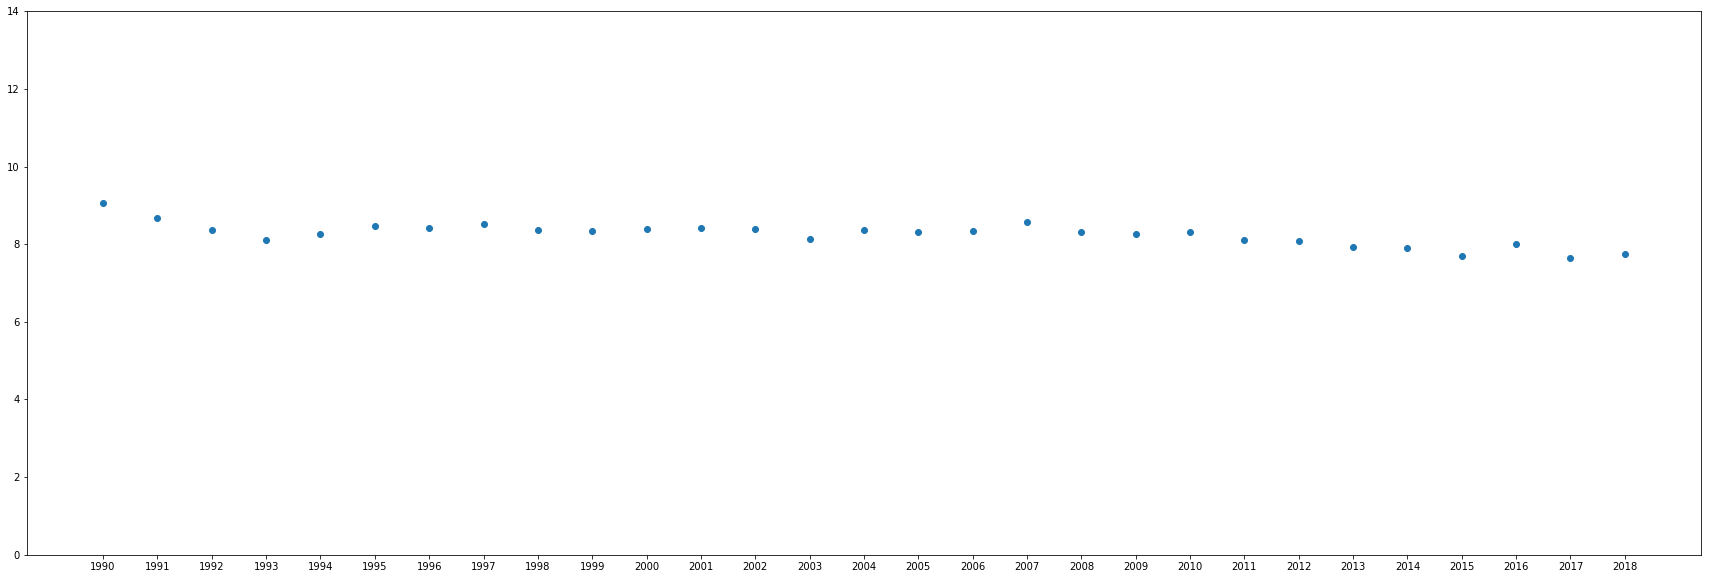

In [7]:
##Creating graph from different years##
keys = list(withYearsMeans.keys())
values = list(withYearsMeans.values())
fontImp = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 15}
plt.figure(figsize=(30,10))
plt.ylim(0, 14)
matplotlib.rc('font', **fontImp)
plt.scatter(keys,values)
plt.show()

Here, we see that there is minimal correlation between the years and acid. This means that an analysis of of the acids in general is possible, while disregarding years. We can see a map to learn more about acidity.

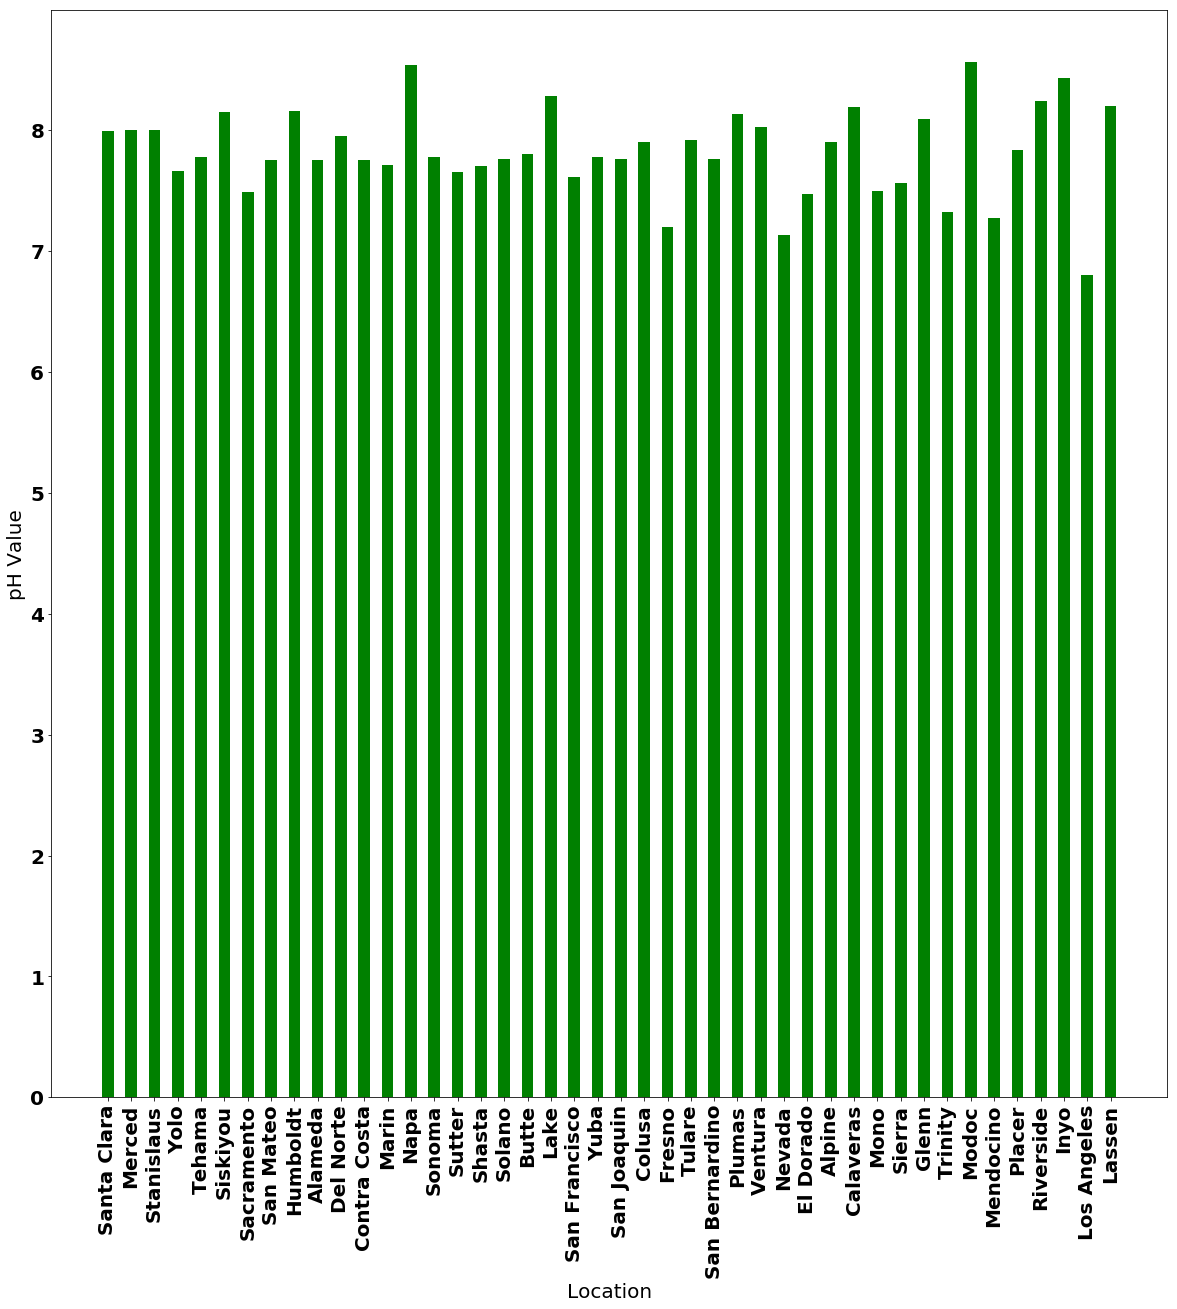

In [8]:

##Graph of pH of different places.##
analyzed = medians
fontImp = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **fontImp)
plt.figure(figsize=(20,20))
plt.bar(analyzed.keys(), analyzed.values(), width = .5, color='g')
rot = plt.xticks(rotation=90)
xLabel = plt.xlabel("Location")
yLabel = plt.ylabel("pH Value")


This map gives a considerable amount of insight, but unfortunately we cannot sufficiently understand the results via location. We should learn more about the relationships between them by putting them on a map indicated by latitute and longitude.

In [9]:
##Defining the acidities, for map plot
acidityLevels = ['#4577f7', '#648ffc','#81a3f9', '#9cb7fc', '#bacdfc', '#f9f9f9', '#fce8e8', '#f2c9c9', '#f2b0b0', '#f29b9b','#f28787'] 
##Reversing List##
acidityLevels = list(reversed(acidityLevels))
waterQualpHMapping = waterQualpH[['longitude','latitude', 'result', 'sampledate']]
waterQualpHMapping = waterQualpHMapping.dropna(how = 'any')
latLong = {}
##Creating acidity markers
for i in range(0,11):
    subset = pd.to_numeric(waterQualpH['result'], downcast='float')
    numRange = .4 * i + 5
    longlat = waterQualpH.loc[((subset > numRange) & (subset<(numRange+.4)))]
    tempList = [list(longlat['longitude']), list(longlat['latitude'])]
    tempList[0] = [elem for elem in tempList[0] if pd.notnull(elem)]
    tempList[1] = [elem for elem in tempList[1] if pd.notnull(elem)]
    latLong[i] = [float(x) for x in tempList[0]], [float(x) for x in tempList[1]]
##List Values
longValue = 0
latValue = 1
b = list(waterQualpHMapping['result'])
a = list(waterQualpHMapping['sampledate'])
textFile = ["Year: " + m+ "<br>" + "pH: " +(n) for m,n in zip(a,b)]

In [10]:
##pH Calculations, separated by location##
acidityDict = {}

long = [float(x) for x in list(waterQualpHMapping['longitude'])]
lat = [float(y) for y in list(waterQualpHMapping['latitude'])]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.



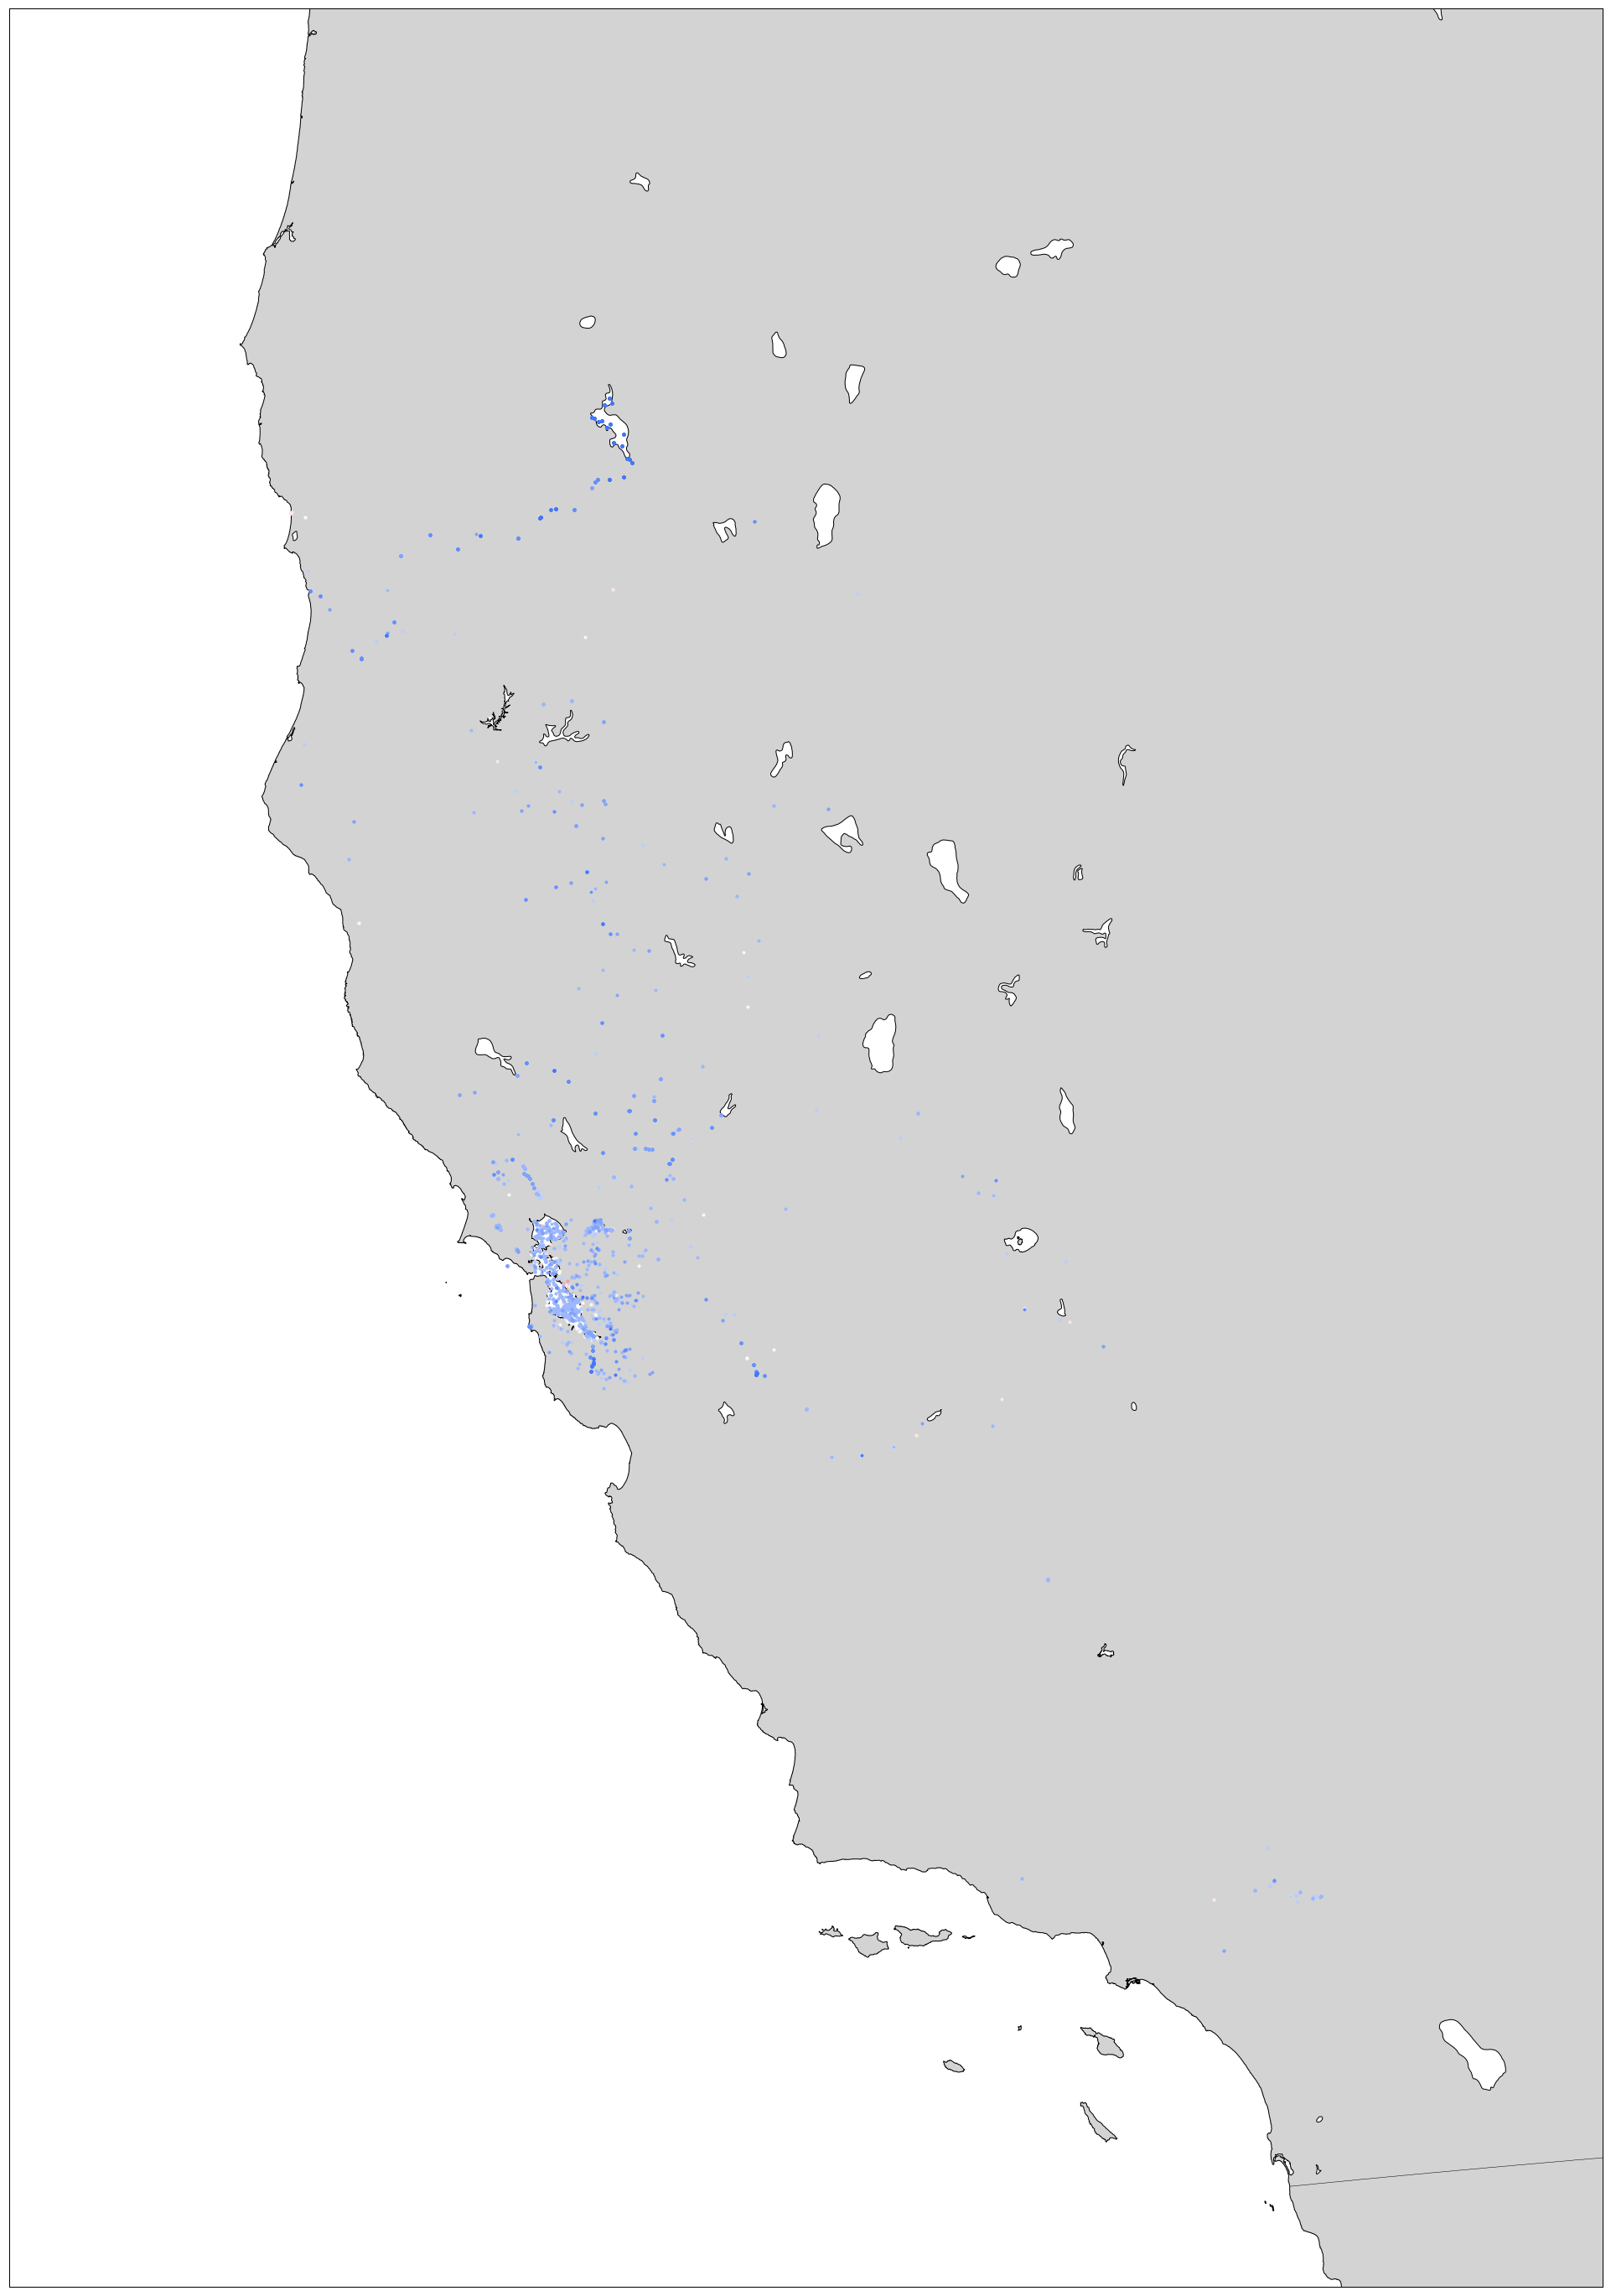

In [11]:
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
long_min = min(long) - margin
long_max = max(long) + margin
lons = []
lats = []
plt.figure(figsize=(50,50))
##create map using basemap##
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'f',
            area_thresh=.1,
            )

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey')
m.drawmapboundary()

##convert lat and long to map projection coordinates##
for i in range(0,11):
    ##Indexing into certain value in latlong with the coordinates##
    longitudeM, latitudeM  = m(latLong[i][longValue], latLong[i][latValue])
    lons.append(longitudeM)
    lats.append(latitudeM)

##plot points as red to blue dots, based on acidity##
for j in range(0,11):
    m.scatter(lons[j], lats[j], marker = '.', color=acidityLevels[j], zorder=10)


plt.show()

This map is helpful, but we try to use a different module so as to analyze it better.

In [12]:
##Plotly Graph
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import random


    


plotly.tools.set_credentials_file(username='aksramk', api_key='MR7XjZwGfIQQpfkmMwaL')
mapbox_access_token = 'pk.eyJ1IjoiYWtzcmFtayIsImEiOiJjam5tNGhoNjEwNDRzM3dubnpxaW50M2lnIn0.BLznKPgvlgbYD0XmqSHAWw'
scl = [ [.09,"rgb(69,119,247)"],[.181,"rgb(100,143,252)"],[.272,"rgb(129,163,249)"],\
    [.363,"rgb(156,183,252)"],[.454,"rgb(186,205,252)"],[.545,"rgb(249,249,249)"],\
    [.636, 'rgb(252,232,232)'], [.727, 'rgb(242,201,201)'], [.818, 'rgb(242,176,176)'], [.909, 'rgb(242,155,155)'], [1.0, 'rgb(242,135,135)']]

data = [
    go.Scattermapbox(
        lat=lat,
        lon=long,
        mode='markers',
        marker=dict(
            
            size=5,
            reversescale = True,
            autocolorscale = False,
            colorscale = scl,
            cmin = 0,
            color= [float(x) for x in waterQualpHMapping['result']],
            cmax = 14,
            colorbar=dict(
                title="pH Values"
            ),
        ),

        text=textFile,
        hoverinfo = "text",
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37,
            lon=-122
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='pH Value')

From this map, we can learn a lot about pH. pH is supposed to be approximately 8.0 for the bay, so everything being blue is normal. There is, however, quite a bit of acidic water around Alameda Island, more than in any other area. This is important analysis, that shows the most acidic water in the bay.

In [13]:
#Creating data from mercury, taken from the water
resultsNumeric = waterQual['result']
resultsNumeric = resultsNumeric.apply(pd.to_numeric)
waterQualMercury = waterQual.loc[((waterQual['analyte'] == 'Mercury') & (waterQual['testmaterial'] == 'water') & \
                                  (waterQual['unitname'] == 'ug/l') & (resultsNumeric < 1)) | \
                                 ((waterQual['analyte'] == 'Mercury') & (waterQual['testmaterial'] == 'water') & \
                                  (waterQual['unitname'] == 'ng/l') & (resultsNumeric < 1000))]
waterQualMercury = waterQualMercury[['longitude','latitude', 'unitname', 'result', 'sampledate', 'sampleyear']]
waterQualMercury = waterQualMercury.dropna(how = 'any')



In [14]:
#Calculating results and converting nanograms into micrograms
resultsUG = waterQualMercury.loc[(waterQualMercury['unitname'] == 'ug/l')]['result']
resultsUG = [float(x) for x in resultsUG]
resultsNG = waterQualMercury.loc[(waterQualMercury['unitname'] == 'ng/l')]['result']
resultsNG = [((float(x))/1000) for x in resultsNG]
longitudes = list(waterQualMercury.loc[(waterQualMercury['unitname'] == 'ug/l')]['longitude'])+ \
            list(waterQualMercury.loc[(waterQualMercury['unitname'] == 'ng/l')]['longitude'])

latitudes = list(waterQualMercury.loc[(waterQualMercury['unitname'] == 'ug/l')]['latitude'])+ \
            list(waterQualMercury.loc[(waterQualMercury['unitname'] == 'ng/l')]['latitude'])
date = list(waterQualMercury.loc[(waterQualMercury['unitname'] == 'ug/l')]['sampledate'])+ \
            list(waterQualMercury.loc[(waterQualMercury['unitname'] == 'ng/l')]['sampledate'])

year = list(waterQualMercury.loc[(waterQualMercury['unitname'] == 'ug/l')]['sampleyear'])+ \
            list(waterQualMercury.loc[(waterQualMercury['unitname'] == 'ng/l')]['sampleyear'])

results = resultsUG + resultsNG
textFile = ["Year: " + m+ "<br>" + "Concentration of Mercury (ug/l): " +(n) for m,n in zip(date,[str(x) for x in results])]


In [15]:
compare1  =waterQualMercury['sampleyear'].apply(pd.to_numeric)
compare2  =waterQualMercury['result'].apply(pd.to_numeric)
compare1.corr(compare2)
##There is small correlation between year and pH, but mercury has gone up as the years have gone by...

0.10861930483713889

In [16]:
import plotly.graph_objs as go
import plotly
import random
##Plotly graph of mercury concentration##
    

colorVal = [float(x) for x in list(waterQualpH['result'])]
plotly.tools.set_credentials_file(username='aksramk', api_key='MR7XjZwGfIQQpfkmMwaL')
mapbox_access_token = 'pk.eyJ1IjoiYWtzcmFtayIsImEiOiJjam5tNGhoNjEwNDRzM3dubnpxaW50M2lnIn0.BLznKPgvlgbYD0XmqSHAWw'
scl = [ [.09,"rgb(69,119,247)"],[.181,"rgb(100,143,252)"],[.272,"rgb(129,163,249)"],\
    [.363,"rgb(156,183,252)"],[.454,"rgb(186,205,252)"],[.545,"rgb(249,249,249)"],\
    [.636, 'rgb(252,232,232)'], [.727, 'rgb(242,201,201)'], [.818, 'rgb(242,176,176)'], [.909, 'rgb(242,155,155)'], [1.0, 'rgb(242,135,135)']]

data = [
    go.Scattermapbox(
        lat=latitudes,
        lon=longitudes,
        mode='markers',
        marker=dict(
            
            size=5,
            reversescale = True,
            autocolorscale = False,
            colorscale = scl,
            cmin = 0,
            color= results,
            cmax = .05,
            colorbar=dict(
                title="Concentration of Mercury"
            ),
        ),
        text=textFile,
        hoverinfo = "text"
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37,
            lon=-122
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Concentration of Mercury')

San Joaquin River, among all rivers, has a significant amount of mercury, and considering the minimal correlation between time and mercury, this is important to consider when talking about Mercury. Mostly, however, throughout the bay, there is basically no Mercury. Also, in general, the amount of Mercury is not enough to be a safety issue, so it isn't the biggest issue.

Dangerous pesticides: https://www.biologicaldiversity.org/campaigns/pesticides_reduction/pdfs/74_pesticides.pdf

In [17]:
compareList = list(set(list(waterQual['analyte'])).intersection(set(list(waterQual['analyte']))))

In [18]:
validPesticides = ['Acrolein', 'Alachlor', 'Aldicarb', 'Atrazine', \
                  'Bensulide', 'Bifenthrin', 'Carbaryl', 'Carbofuran',\
                  'Chlorothalonil', 'Chlorpyrifos', 'Cyhalothrin', 'Deltamethrin',\
                  'Diazinon', 'Dimethoate', 'Disulfoton', 'Esfenvalerate', 'Ethoprop',\
                  'Fenpropathrin', 'Fipronil', 'Fluvalinate', 'Imidacloprid', 'Malathion',\
                  'Methamidophos', 'Methidathion', 'Methomyl', 'Methoprene', 'Metolachlor',\
                  'Naled', 'Oryzalin', 'Oxyfluorfen', 'Pendimethalin', 'Phenothrin', 'Phorate',\
                  'Propargite', 'Resmethrin', 'Simazine', 'Tetramethrin', 'Thiobencarb', 'Warfarin', \
                 'Glyphosate', 'Paraquat', 'Dichloropropane, 2,4-']

In [23]:
##User inputs pesticides of interest##

while True:
    try:
        pesticides = []
        p = input("Which pesticides? ")
        if p == 'all':
            pesticides = validPesticides
            break
        p = p.split(', ')
        if len(p)==1 and ':' in p[0]:
            p = p[0]

        try:
            check = int(p[0:1])
            p = p.split(':')
            for j in range(int(p[0]),min(int(p[1]), len(validPesticides))):
                if validPesticides[j] in compareList:
                    pesticides.append(validPesticides[j])

        except TypeError:
            for i in p:
                if i in compareList:
                    pesticides.append(i)
                else:
                    print("Sorry, the pesticide " + i + " is not in the database. It will not be included in any map.")
        break
        break
    except TypeError:
        print("Sorry, that is not a valid input.\n")
        break

Which pesticides? Glyphosate, Paraquat, Atrazine


In [24]:
waterQualPesticides = waterQual[['sampledate', 'longitude', 'latitude', 'result', \
                                 'analyte', 'unitname', 'testmaterial', 'sampleyear']]
waterQualPesticides = waterQualPesticides.loc[(waterQualPesticides['analyte'].isin(pesticides)) & \
                        (waterQual['testmaterial'] == 'water')]                  
waterQualPesticides = waterQualPesticides.loc[(waterQualPesticides['result'] != '0')]
waterQualPesticides['unitname'].unique()
print(pesticides)

['Glyphosate', 'Paraquat', 'Atrazine']


In [25]:
resultsUG = waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'ug/l')]['result']
resultsUG = [float(x) for x in resultsUG]
resultsNG = waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'ng/l')]['result']
resultsNG = [(float(x))/1000 for x in resultsNG]
resultsPG = waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'pg/l')]['result']
resultsPG = [(float(x))/1000000 for x in resultsPG]
longitudes = list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'ug/l')]['longitude'])+ \
            list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'ng/l')]['longitude']) +\
            list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'pg/l')]['longitude'])

latitudes = list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'ug/l')]['latitude'])+ \
            list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'ng/l')]['latitude'])+\
            list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'pg/l')]['latitude'])

date = list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'ug/l')]['sampledate'])+ \
            list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'ng/l')]['sampledate'])+\
            list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'pg/l')]['sampledate'])

pesticideTypes = list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'ug/l')]['analyte'])+ \
            list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'ng/l')]['analyte']) +\
            list(waterQualPesticides.loc[(waterQualPesticides['unitname'] == 'pg/l')]['analyte'])
results = resultsUG + resultsNG + resultsPG
textFile = ["Year: " + m+ "<br>" + "Concentration of " + l + "(ug/l): " +(n) for m,n,l in zip(date,[str(x) for x in results], pesticideTypes)]


In [26]:


    

colorVal = [float(x) for x in list(waterQualpH['result'])]
plotly.tools.set_credentials_file(username='aksramk', api_key='MR7XjZwGfIQQpfkmMwaL')
mapbox_access_token = 'pk.eyJ1IjoiYWtzcmFtayIsImEiOiJjam5tNGhoNjEwNDRzM3dubnpxaW50M2lnIn0.BLznKPgvlgbYD0XmqSHAWw'
scl = [ [.09,"rgb(69,119,247)"],[.181,"rgb(100,143,252)"],[.272,"rgb(129,163,249)"],\
    [.363,"rgb(156,183,252)"],[.454,"rgb(186,205,252)"],[.545,"rgb(249,249,249)"],\
    [.636, 'rgb(252,232,232)'], [.727, 'rgb(242,201,201)'], [.818, 'rgb(242,176,176)'], [.909, 'rgb(242,155,155)'], [1.0, 'rgb(242,135,135)']]

data = [
    go.Scattermapbox(
        lat=latitudes,
        lon=longitudes,
        mode='markers',
        marker=dict(
            
            size=5,
            reversescale = True,
            autocolorscale = False,
            colorscale = scl,
            cmin = 0,
            color= results,
            cmax = .05,
            colorbar=dict(
                title="Concentration of Pesticides"
            ),
        ),
        text=textFile,
        hoverinfo = "text"
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37,
            lon=-122
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Concentration of Pesticides')

Website for EXTRA dangerous pesticides: https://www.revealnews.org/article-legacy/5-pesticides-used-in-us-are-banned-in-other-countries/
Of these pesticides, there are many in the dataset concentrated in different places: For instancethere is quite a bit of Atrazine and Glyphosate, which are both extremely dangerous pesticides. The pesticide Paraquat, which has extreme direct connections to Parkinson's disease is found as well. These findings are important to investigating dangerous but commonly used pesticides.


In the 1990s, San Francisco Bay Area creeks water bodies were found to exceed water quality standards for aquatic toxicity, primarily due to runoff of the common insecticide diazinon. Diazinon was commonly used throughout the Bay Area to manage a broad spectrum of pests, such as ants and grubs.

Tule and Saint Johns River have glyphosate, atrazine, and paraquat.

# Abstract
If you want to run some of the cells in the notebook, just download this .ipynb and run in on Jupyet Notebook, there is a option to do so at the top of nbviewer.
## pH in the bay
To understand the effects of pH in the bay, and to gain familiarity with the data, I started off by finding the correlation between the year and the acidity. Although over the years, the acidity has increased, it was by a minimal amount, and finding and analyzing the most acidic areas is most important. I plotted the data in a bar graph using the locations provided in the data, and found that Los Angeles was the most acidic location, on average. However, I thought that plotting the data based on precise values, like longitude and latitude values, might be more helpful. To do this, I plotted the data using plotly and basemap (separately), giving each data point its year and pH values. This map can be found above, along with the bar graph. The datapoints are coloured based on their values. Almost all of the values are basic, as they should be in the bay. The only acidic values are all around southeast Alameda, and the measurements are relatively recent, in 2015. If there was any area that should be flagged for concern in terms of acidity, it should be Alameda.

## Mercury in the bay
Next, to understand, Mercury, I found the correlation between the year and the acidity. Similarly to pH, the concentrations have rised slightly over the years, yet none of the values seemed to be cause for concern. I graphed the data with plotly, after converting units to micrograms/liter and is availible above. An unsafe amount of mercury in water is classified as 2 micrograms/liter, and none of the mercury measurements came close to this level. However, the San Joaquin River had consistently high measurements of mercury, at about 0.1 ug/L. There have also been articles concerning contaminated fish around these areas, flagging them for concern. These datapoints, however, were almost a decade ago, so may have changed in recent years, possibly for the worse.
https://www.ncbi.nlm.nih.gov/pubmed/20176346

## Pesticides in the bay
In order to get more insight into the bay as a whole, I searched up a list of concerning pesticides in the bay area at biologicaldiversity.org (bit.ly/2FVTUPj). Then, I identified all of these pesticides that were in the dataset: 42. Above, there is a cell which, when run, allows you to select a portion of the pesticides to look at. After selecting, it will display of map of all of these pesticides, the year their measurements were collected, and their concentration. I took 3 especially bad pesticides in the current results, and graphed them above. They can be found in this link (http://bit.ly/2E0trOf). Each of these three, bad pesticides showed up multiple times on the map:

### Atrazine
According to the link above, "A popular herbicide called atrazine is the pesticide most commonly found in American drinking water. The European Union banned it in 2004 but the EPA re-evaluated and OK’d atrazine use in 2009. While it breaks down quickly in soil, it tends to hang around in water. Almost 90 percent of drinking water in the U.S. has atrazine in it, according to an analysis of U.S. Department of Agriculture data by the Pesticide Action Network. The weed killer messes with hormones, affects the immune system and is linked to birth defects." It is very harmful

There is quite a little bit of atrazine throughout the bay, about 10 measurements of it. These measurements are from about 10 years ago, so the problem could have gotten worse or better over the years. The amounts reach a high of .5 ug per liter, with the unsafe levels being around 3 ppb, or 3 ug/L. This is relatively low, but there are studies that show that even small amounts can affect hormones significantly.


### Paraquat
"Paraquat, a pesticide linked to Parkinson’s disease, is banned in China and the European Union but not the U.S. It’s highly toxic and kills weeds on contact. A 2009 UCLA study found that a person exposed to paraquat and two other pesticides is three times as likely to develop Parkinson’s disease. Paraquat also can cause kidney damage and difficulty breathing." 

There are about 10 data points for Paraquat in the data, with a maximum concentration of 1.5 ug/L.

### Glyphosate
"Scientists suspect [glyphosate] may be the culprit in widespread kidney disease among agricultural workers in Sri Lanka, India and Central America. It’s the best-selling herbicide in the world, according to the Ag Journal. And it was the most heavily used pesticide in the U.S. in 2007, according to the most recent numbers available from the EPA." The Environmental Working Group’s health recommendation is a maximum of 5 ppb, or 5 ug/L. However, the maximum values from the measurements are 20 ug/L. This makes sense, because the actual EPA maximum contaminant level is 700 ug/L, even though these levels are much greater than more health ones. The dates for the high glyphosate measurements are 5-10 years ago.


I didn't have time to research the other pesticides, but feel free to utilize the mechanism to look at some of the other important, harmful chemicals.

## Conclusion
Overall, these conclusions are important to understanding the safety of Bay Area waters, and these tools allow for further investigation. Thanks for reading!